# **Problem 1**

In [1]:
#importing libraries & mounting from google drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = "/content/drive/MyDrive/Class/Intro-to-ML-main/Datasets/D3.csv"
data = pd.read_csv(file_path)
data.head( )

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375


In [3]:
#extracting variable from csv
X1 = data['X1'].values
X2 = data['X2'].values
X3 = data['X3'].values
y = data['Y'].values

In [4]:
#adding bias 1 to the explanatory variable & and stacking
m = len(y)
X_0 = np.ones((m,1))
X_1 = X1.reshape(m,1)
X_2 = X2.reshape(m,1)
X_3 = X3.reshape(m,1)
x1 = np.hstack((X_0, X_1))
x2 = np.hstack((X_0, X_2))
x3 = np.hstack((X_0, X_3))


In [12]:
#parameter
lr = 0.1
epochs = 1500

#gradient descent function 2 in 1
def gdsingle(X,y,lr,epochs):
  theta = np.zeros(X.shape[1])
  cost_history = []
  for epoch in range(epochs):
    prediction = X.dot(theta) #prediction
    error = np.subtract(prediction,y) #calculate error
    cost = 1/(2*m) * np.sum(np.square(error)) #cost
    cost_history.append(cost)
    gradients = (1/m)*X.T.dot(error) #gradient
    theta -= lr * gradients #update
  return theta, cost_history

In [13]:
#running gradient descent for x1, x2, x3 in isolation
theta_x1, cost_history_x1 = gdsingle(x1,y,lr,epochs)
theta_x2, cost_history_x2 = gdsingle(x2,y,lr,epochs)
theta_x3, cost_history_x3 = gdsingle(x3,y,lr,epochs)

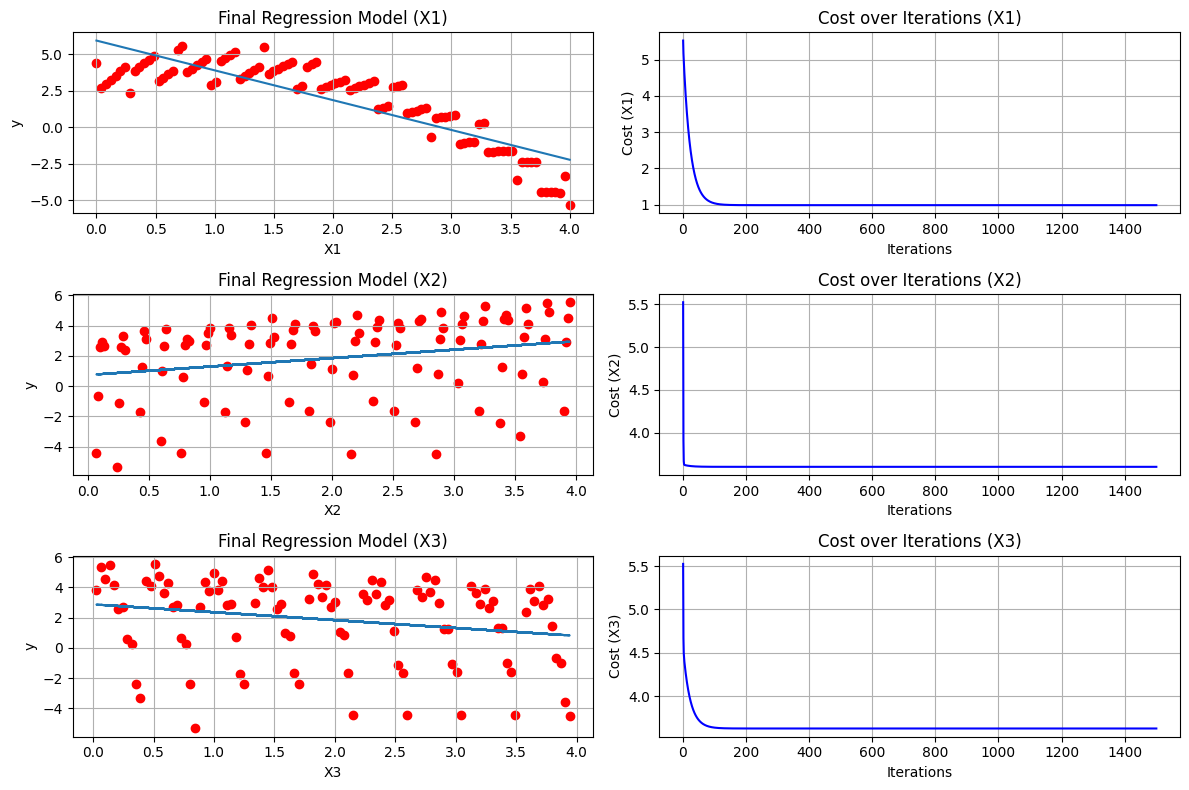

In [14]:
# Plotting the final regression model and loss over iteration for each explanatory variable
plt.figure(figsize=(12, 8))

# X1
plt.subplot(3, 2, 1)
plt.plot(x1[:, 1], x1.dot(theta_x1), label='Regression line (X1)')
plt.scatter(x1[:, 1], y, color='red')
plt.xlabel('X1')
plt.ylabel('y')
plt.title('Final Regression Model (X1)')
plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(range(1, epochs + 1), cost_history_x1, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost (X1)')
plt.title('Cost over Iterations (X1)')
plt.grid(True)

# X2
plt.subplot(3, 2, 3)
plt.plot(x2[:, 1], x2.dot(theta_x2), label='Regression line (X2)')
plt.scatter(x2[:, 1], y, color='red')
plt.xlabel('X2')
plt.ylabel('y')
plt.title('Final Regression Model (X2)')
plt.grid(True)

plt.subplot(3, 2, 4)
plt.plot(range(1, epochs + 1), cost_history_x2, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost (X2)')
plt.title('Cost over Iterations (X2)')
plt.grid(True)

# X3
plt.subplot(3, 2, 5)
plt.plot(x3[:, 1], x3.dot(theta_x3), label='Regression line (X3)')
plt.scatter(x3[:, 1], y, color='red')
plt.xlabel('X3')
plt.ylabel('y')
plt.title('Final Regression Model (X3)')
plt.grid(True)

plt.subplot(3, 2, 6)
plt.plot(range(1, epochs + 1), cost_history_x3, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost (X3)')
plt.title('Cost over Iterations (X3)')
plt.grid(True)

plt.tight_layout()
plt.show()

# **Problem 2**

In [15]:
#extracting variable
X = data[['X1', 'X2', 'X3']].values
y = data['Y'].values

#adding bias 1 to the explanatory variable & and stacking
X_0 = np.ones((m,1))
X = np.hstack((X_0, X))
X[:5]

array([[1.        , 0.        , 3.44      , 0.44      ],
       [1.        , 0.04040404, 0.1349495 , 0.88848485],
       [1.        , 0.08080808, 0.82989899, 1.3369697 ],
       [1.        , 0.12121212, 1.52484848, 1.78545454],
       [1.        , 0.16161616, 2.21979798, 2.23393939]])

In [16]:
lr1 = 0.1
lr2 = 0.02
def gd(X,y,lr,epochs):
  theta = np.zeros(X.shape[1])
  cost_history = []
  for epoch in range(epochs):
    prediction = X.dot(theta) #prediction
    error = np.subtract(prediction,y) #calculate error
    cost = 1/(2*m) * np.sum(np.square(error)) #cost
    cost_history.append(cost)
    gradients = (1/m)*X.T.dot(error) #gradient
    theta -= lr * gradients #update
  return theta, cost_history
#gradient descent with learning rates 0.1 and 0.01
theta_lr_1, cost_history_lr_1 = gd(X, y, lr1, epochs)
theta_lr_2, cost_history_lr_2 = gd(X, y, lr2, epochs)


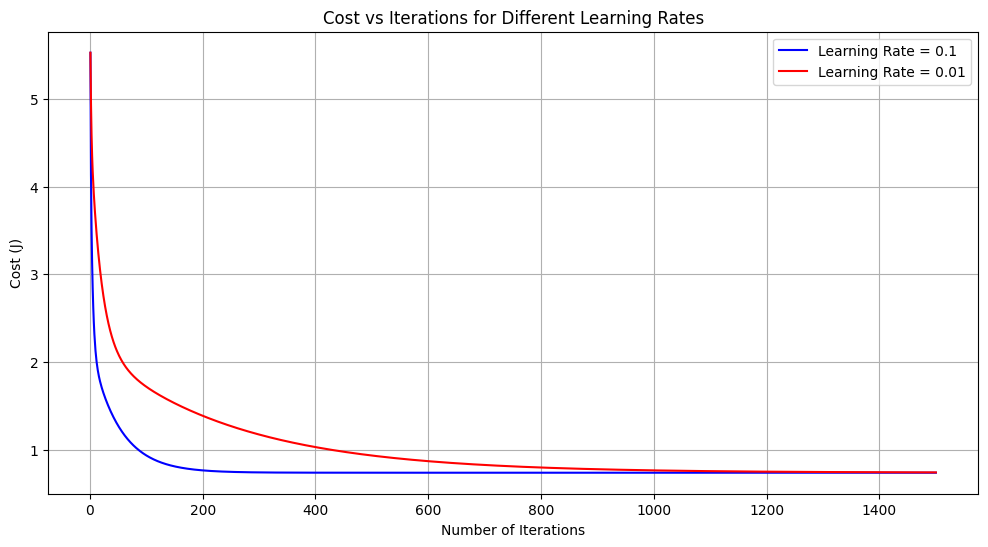

Predictions with Learning Rate = 0.1:
For (1, 1, 1): 3.577408529345461
For (2, 0, 4): 0.2443209702176521
For (3, 2, 1): 0.10253401973591902

Predictions with Learning Rate = 0.01:
For (1, 1, 1): 3.435131252162954
For (2, 0, 4): 0.21020309050277053
For (3, 2, 1): 0.07674479909640652


In [17]:
# Plot the cost history for both learning rates
plt.figure(figsize=(12, 6))
plt.plot(range(1, epochs + 1), cost_history_lr_1, label='Learning Rate = 0.1', color='blue')
plt.plot(range(1, epochs + 1), cost_history_lr_2, label='Learning Rate = 0.01', color='red')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.title('Cost vs Iterations for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

# Predictions for new values of (X1, X2, X3)
new_values = np.array([[1, 1, 1, 1],  # Adding bias (1) to the new values
                       [1, 2, 0, 4],
                       [1, 3, 2, 1]])

# Predictions using the model with learning rate = 0.1
predictions_lr_1 = new_values.dot(theta_lr_1)

# Predictions using the model with learning rate = 0.01
predictions_lr_2 = new_values.dot(theta_lr_2)

# Output predictions for both learning rates
print("Predictions with Learning Rate = 0.1:")
print(f"For (1, 1, 1): {predictions_lr_1[0]}")
print(f"For (2, 0, 4): {predictions_lr_1[1]}")
print(f"For (3, 2, 1): {predictions_lr_1[2]}")

print("\nPredictions with Learning Rate = 0.01:")
print(f"For (1, 1, 1): {predictions_lr_2[0]}")
print(f"For (2, 0, 4): {predictions_lr_2[1]}")
print(f"For (3, 2, 1): {predictions_lr_2[2]}")